Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [7]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


In [8]:
print(X[0:5,:])
print()
print(y_true[0:5,])

[[-3.03756397e-01  2.71942959e-01 -1.29846260e+00 -1.48959593e+00
  -4.84564979e-01 -1.62288582e+00 -9.36191216e-01 -2.29277017e-01
   6.02900633e-01  2.06380503e-01]
 [-2.00532694e-01 -3.04371161e-01 -9.72955266e-01 -2.00281327e+00
  -6.51490102e-01 -1.79624293e+00 -6.04326763e-01 -1.26436286e-01
   1.27256776e+00 -6.41988924e-02]
 [ 1.35097255e+00  9.30483233e-01 -4.32428655e-01  5.53371007e-01
  -4.59188229e-01  1.29529554e-01  1.40720364e+00 -4.53564267e-01
   1.06455736e+00 -1.02736984e+00]
 [-5.32715151e-01  1.67204969e-02 -7.85554107e-01  7.55822307e-01
  -9.14308286e-01  8.56017276e-01 -7.03068506e-02  5.17710309e-01
   4.22727842e-01 -9.49036061e-01]
 [-8.06342668e-01  4.97419445e-01 -8.16707635e-01  1.66480465e+00
  -5.25739806e-01  3.17080798e-01 -3.05295579e-01  5.35101333e-01
   1.69320289e-03 -1.53752575e+00]]

[0 0 4 1 1]


Total Inertia Value (k=5): 924.32



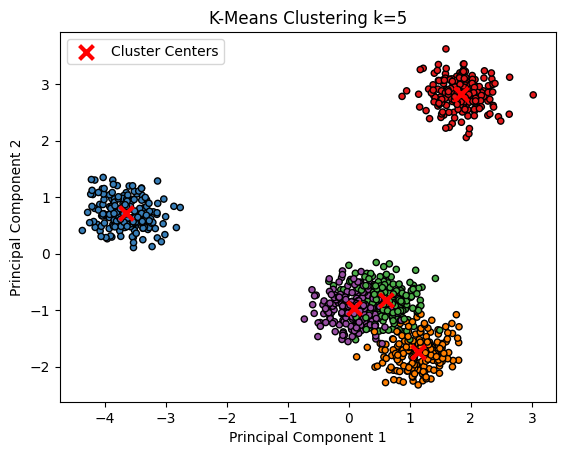

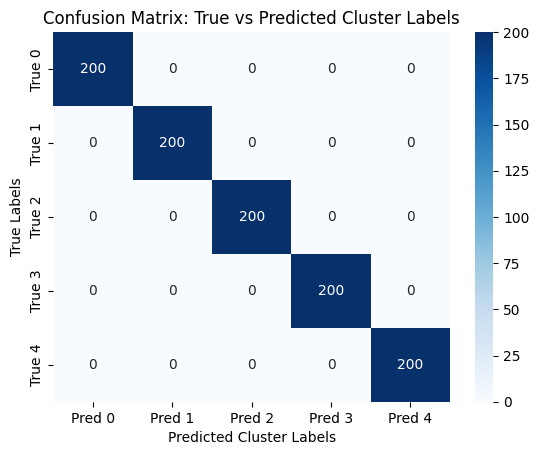

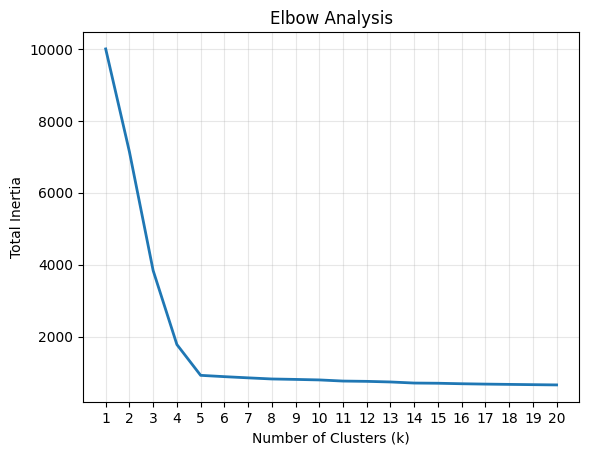


Inertia Values for Different Values of k:
k = 1: Inertia = 10000.00
k = 2: Inertia = 7139.16
k = 3: Inertia = 3836.38
k = 4: Inertia = 1780.42
k = 5: Inertia = 924.32
k = 6: Inertia = 887.74
k = 7: Inertia = 854.65
k = 8: Inertia = 823.30
k = 9: Inertia = 811.04
k = 10: Inertia = 796.77
k = 11: Inertia = 765.24
k = 12: Inertia = 756.95
k = 13: Inertia = 739.99
k = 14: Inertia = 709.94
k = 15: Inertia = 704.47
k = 16: Inertia = 690.57
k = 17: Inertia = 680.57
k = 18: Inertia = 672.75
k = 19: Inertia = 665.04
k = 20: Inertia = 657.88


In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.optimize import linear_sum_assignment
import random
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

np.random.seed(1)
random.seed(1)

kmeans_model = KMeans(n_clusters=5, random_state=1) # n_clusters = k, other params: n_init=1, init='random', max_iter=1
y_pred = kmeans_model.fit_predict(X)

pca_model = PCA()
X_PCA = pca_model.fit_transform(X)

cluster_centers_pca = pca_model.transform(kmeans_model.cluster_centers_)

print(f"Total Inertia Value (k=5): {kmeans_model.inertia_:.2f}")
print()

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y_pred, cmap=cmap, edgecolor='k', s=20)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='x', s=100, linewidth=3, label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering k=5')
plt.legend()
plt.show()

print()
print()

cm = confusion_matrix(y_true, y_pred)

# Find the best label mapping
row_i, col_i = linear_sum_assignment(-cm) # negative to maximize the alignment in cm
# col_i[i] contains the predicted labels that best correspond to y_true labels contained in row_i[i]

label_mapping = {} # dictionary (strings, int, etc.)
for i in range(len(row_i)):
    cluster_id = col_i[i] # cluster
    class_id = row_i[i]   # class mapped to
    label_mapping[cluster_id] = class_id

y_pred_mapped = [] # list (ints only)
for i in y_pred:
    mapped_class = label_mapping[i]
    y_pred_mapped.append(mapped_class)

y_pred_mapped = np.array(y_pred_mapped) # back to array

cm_mapped = confusion_matrix(y_true, y_pred_mapped)

sns.heatmap(cm_mapped, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Pred {i}' for i in range(5)],
            yticklabels=[f'True {i}' for i in range(5)])
plt.title('Confusion Matrix: True vs Predicted Cluster Labels')
plt.ylabel('True Labels')
plt.xlabel('Predicted Cluster Labels')
plt.show()

print()
print()

k_range = range(1, 21)
inertia_values = []

for k in k_range:
    kmeans_temp_val = KMeans(n_clusters=k, random_state=1)
    kmeans_temp_val.fit(X)
    inertia_values.append(kmeans_temp_val.inertia_)

plt.plot(k_range, inertia_values, linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Total Inertia')
plt.title('Elbow Analysis')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.show()

print()
print("Inertia Values for Different Values of k:")

for i in range(len(k_range)):
  k = k_range[i]
  inertia = inertia_values[i]
  print(f"k = {k}: Inertia = {inertia:.2f}")

In [10]:
# Smallest K-means Inertia Value (for each cluster)
def each_cluster_inertia(X, kmeans_model):
    cluster_labels = kmeans_model.labels_
    cluster_centers = kmeans_model.cluster_centers_

    individual_inertias = {}

    for cluster in np.unique(cluster_labels):
        cluster_points = []

        for i in range(len(cluster_labels)):
          if cluster_labels[i] == cluster:
            cluster_points.append(X[i])

        cluster_points = np.array(cluster_points)

        center = cluster_centers[cluster]
        squared_distances = np.sum((cluster_points - center) ** 2)

        cluster_inertia = np.sum(squared_distances)
        individual_inertias[cluster] = cluster_inertia

    return individual_inertias

cluster_inertias = each_cluster_inertia(X, kmeans_model)

print("Different Cluster Inertias:")
for cluster in sorted(cluster_inertias.keys()):
    print(f"Cluster {cluster}: {cluster_inertias[cluster]:.3f}")

Different Cluster Inertias:
Cluster 0: 189.773
Cluster 1: 180.075
Cluster 2: 179.318
Cluster 3: 185.724
Cluster 4: 189.425


# 2. Clustering Fashion-MNIST using $k$-means

In [34]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


In [35]:
print(X[0:5,0:25])
print()
print(y[0:5,])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  22 118  24   0   0   0   0   0  48
   88   5   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194
  102   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26
    0   0   0   0   0   0   0]]

[9 0 0 3 0]


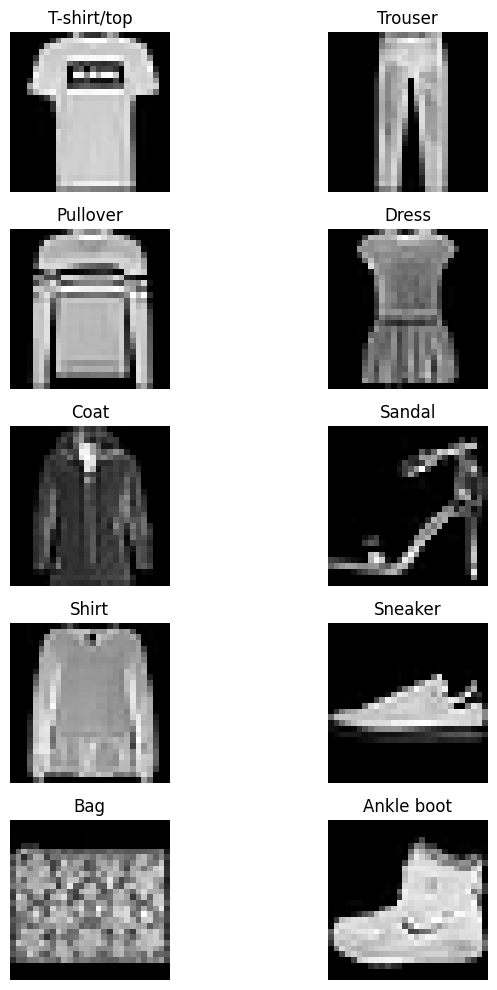

In [36]:
# 5x2 array of figures, each plotting a distinct article of clothing
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(8, 10))

for i in range(10):
    plt.subplot(5, 2, i+1)
    first_image = X[y == i][0].reshape(28, 28)
    plt.imshow(first_image, cmap='gray')
    plt.title(classes[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [37]:
# Sample
np.random.seed(1)
random.seed(1)

print("Class counts:")
for i in range(len(classes)):
  print(f"{classes[i]}: {np.sum(y == i)}")

X_sample = []
y_sample = []

for i in range(len(classes)):
    class_mask = y == i
    class_indices = np.where(class_mask)[0]
    random_sample = np.random.choice(class_indices, 2000, replace=False)

    X_sample.extend(X[random_sample])
    y_sample.extend(y[random_sample])

X_sample = np.array(X_sample)
y_sample = np.array(y_sample)

print()
print("Sample class counts:")
for i in range(len(classes)):
  print(f"{classes[i]}: {np.sum(y_sample == i)}")

print()
print("Sampled data shape:", X_sample.shape)
print("Sampled labels shape:", y_sample.shape)


Class counts:
T-shirt/top: 7000
Trouser: 7000
Pullover: 7000
Dress: 7000
Coat: 7000
Sandal: 7000
Shirt: 7000
Sneaker: 7000
Bag: 7000
Ankle boot: 7000

Sample class counts:
T-shirt/top: 2000
Trouser: 2000
Pullover: 2000
Dress: 2000
Coat: 2000
Sandal: 2000
Shirt: 2000
Sneaker: 2000
Bag: 2000
Ankle boot: 2000

Sampled data shape: (20000, 784)
Sampled labels shape: (20000,)


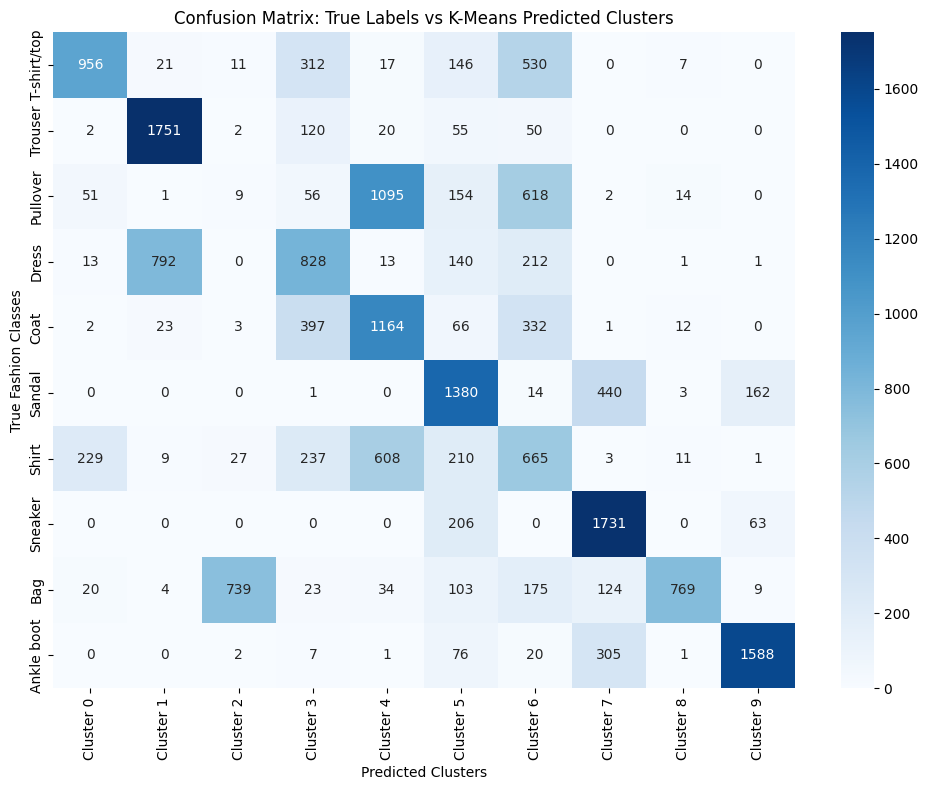

In [38]:
# K-Means Cluster Analysis
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

kmeans_model = KMeans(n_clusters=10, random_state=1)
y_pred = kmeans_model.fit_predict(X_sample_scaled)

#pca_model = PCA()
#X_PCA = pca_model.fit_transform(X_sample_scaled)

#cluster_centers_pca = pca_model.transform(kmeans_model.cluster_centers_)

#plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y_pred, cmap=cmap, edgecolor='k', s=20)
#plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='x', s=100, linewidth=3, label='Cluster Centers')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.title('K-Means Clustering Fashion-MNIST')
#plt.legend()
#plt.show()

print()
print()

cm = confusion_matrix(y_sample, y_pred)

# Find the best label mapping
row_ind, col_ind = linear_sum_assignment(-cm)

# Create a mapping dictionary
label_mapping = {}
for i in range(len(row_ind)):
    label_mapping[col_ind[i]] = row_ind[i]

# Apply the mapping
y_pred_mapped = np.array([label_mapping[label] for label in y_pred])

cm_mapped = confusion_matrix(y_sample, y_pred_mapped)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_mapped, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in range(10)],
            yticklabels=classes)
plt.title('Confusion Matrix: True Labels vs K-Means Predicted Clusters')
plt.ylabel('True Fashion Classes')
plt.xlabel('Predicted Clusters')
plt.tight_layout()
plt.show()

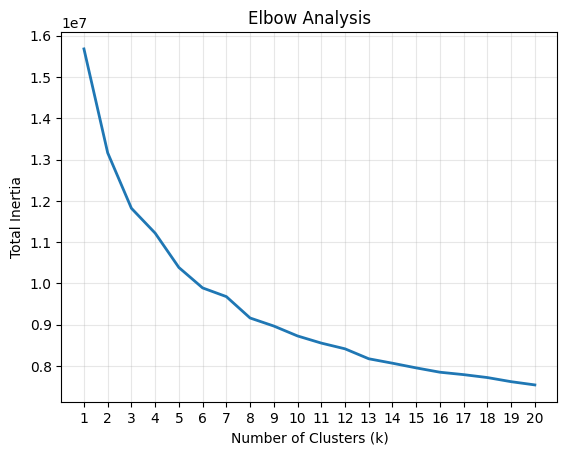


Inertia Values for Different Values of k:
k = 1: Total Inertia = 15680000.00
k = 2: Total Inertia = 13162710.62
k = 3: Total Inertia = 11818700.28
k = 4: Total Inertia = 11216773.19
k = 5: Total Inertia = 10383751.39
k = 6: Total Inertia = 9889084.65
k = 7: Total Inertia = 9678334.91
k = 8: Total Inertia = 9160302.79
k = 9: Total Inertia = 8965056.99
k = 10: Total Inertia = 8724998.53
k = 11: Total Inertia = 8552020.97
k = 12: Total Inertia = 8413188.37
k = 13: Total Inertia = 8172258.78
k = 14: Total Inertia = 8064497.29
k = 15: Total Inertia = 7951047.59
k = 16: Total Inertia = 7846269.18
k = 17: Total Inertia = 7787651.21
k = 18: Total Inertia = 7716903.88
k = 19: Total Inertia = 7617071.01
k = 20: Total Inertia = 7538429.96


In [39]:
k_range = range(1, 21)
inertia_values = []

for k in k_range:
    kmeans_temp_val = KMeans(n_clusters=k, random_state=1)
    kmeans_temp_val.fit(X_sample_scaled)
    inertia_values.append(kmeans_temp_val.inertia_)

plt.plot(k_range, inertia_values, linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Total Inertia')
plt.title('Elbow Analysis')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.show()

print()
print("Inertia Values for Different Values of k:")

for i in range(len(k_range)):
  k = k_range[i]
  inertia = inertia_values[i]
  print(f"k = {k}: Total Inertia = {inertia:.2f}")

In [41]:
def cluster_purity(y_true, y_pred):
    return {cluster: (np.bincount(y_true[y_pred == cluster]).max() /
                     np.sum(y_pred == cluster)) * 100
            for cluster in np.unique(y_pred)}

purities = cluster_purity(y_sample, y_pred)

purities_by_class = {}
# same cluster mapping as the correlation matrix
for cluster, purity in purities.items():
    mapped_class = label_mapping[cluster]
    purities_by_class[mapped_class] = purity

for mapped_class in sorted(purities_by_class.keys()):
    purity = purities_by_class[mapped_class]
    print(f"Cluster: {mapped_class} | Purity: {purity:.1f}%")

print()
print(f"Mean: {np.mean(list(purities_by_class.values())):.1f}%")

Cluster: 0 | Purity: 75.1%
Cluster: 1 | Purity: 67.3%
Cluster: 2 | Purity: 93.2%
Cluster: 3 | Purity: 41.8%
Cluster: 4 | Purity: 39.4%
Cluster: 5 | Purity: 54.4%
Cluster: 6 | Purity: 25.4%
Cluster: 7 | Purity: 66.4%
Cluster: 8 | Purity: 94.0%
Cluster: 9 | Purity: 87.1%

Mean: 64.4%


[np.float64(0.16554697980737193), np.float64(0.1362056285308914), np.float64(0.10104122300206349), np.float64(0.1262021119405159), np.float64(0.12149517233735432), np.float64(0.10959625273873987), np.float64(0.127247735120374), np.float64(0.11771017506360087), np.float64(0.11935283656432955), np.float64(0.11198643055298232), np.float64(0.11356368904289943), np.float64(0.11650330067732023), np.float64(0.10986796541680129), np.float64(0.10584337125118329)]


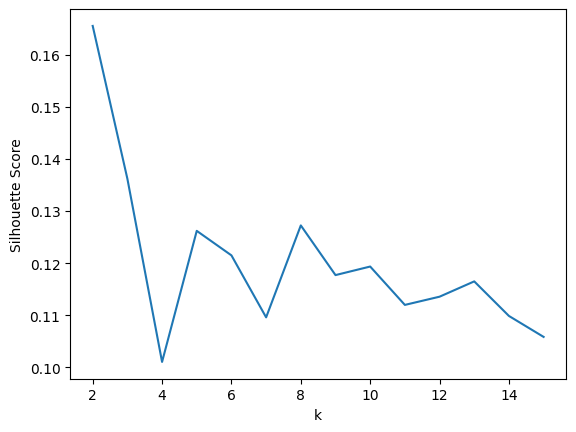

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
silhouette_avg = []

for k in range_n_clusters:
    kmeans_model = KMeans(n_clusters=k, random_state=1)
    cluster_labels = kmeans_model.fit_predict(X_sample_scaled)
    silhouette_avg.append(silhouette_score(X_sample_scaled, cluster_labels))

print(silhouette_avg)
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

# 3. Dimensionality reduction for Fashion-MNIST

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import pearsonr
import pandas as pd
import random
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection

np.random.seed(1)
random.seed(1)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

X_sample = []
y_sample = []

for i in range(len(classes)):
    class_mask = y == i
    class_indices = np.where(class_mask)[0]
    random_sample = np.random.choice(class_indices, 250, replace=False)

    X_sample.extend(X[random_sample])
    y_sample.extend(y[random_sample])

X_sample = np.array(X_sample)
y_sample = np.array(y_sample)

print()
print("Sample class counts:")
for i in range(len(classes)):
  print(f"{classes[i]}: {np.sum(y_sample == i)}")

print()
print("Sampled data shape:", X_sample.shape)
print()

# Scale sampled data
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

# Target dimensions
target_dims = [10, 20, 50, 100, 200]

# Pairwise distances in original standardized space
original_space = euclidean_distances(X_sample_scaled)

pca_correlations = []
print("PCA:")

# PCA for each target dimension
for k in target_dims:
    pca = PCA(n_components=k)
    pca_k = pca.fit_transform(X_sample_scaled)

    # Reduced pairwise distances
    reduced_space = euclidean_distances(pca_k)

    # Correlation between distance matrices
    correlation, _ = pearsonr(original_space.flatten(), reduced_space.flatten())
    pca_correlations.append(correlation)

    print(f"k = {k}: Correlation = {correlation:.4f}")

print()

random_projection_correlations = []
print("Random Projections:")

# Random projections for each target dimension
for k in target_dims:
    random_projection = GaussianRandomProjection(n_components=k, random_state=1)
    random_projection_k = random_projection.fit_transform(X_sample_scaled)

    # Reduced pairwise distances
    reduced_space = euclidean_distances(random_projection_k)

    # Correlation between distance matrices
    correlation, _ = pearsonr(original_space.flatten(), reduced_space.flatten())
    random_projection_correlations.append(correlation)

    print(f"k = {k}: Correlation = {correlation:.4f}")


Sample class counts:
T-shirt/top: 250
Trouser: 250
Pullover: 250
Dress: 250
Coat: 250
Sandal: 250
Shirt: 250
Sneaker: 250
Bag: 250
Ankle boot: 250

Sampled data shape: (2500, 784)

PCA:
k = 10: Correlation = 0.9091
k = 20: Correlation = 0.9562
k = 50: Correlation = 0.9881
k = 100: Correlation = 0.9962
k = 200: Correlation = 0.9991

Random Projections:
k = 10: Correlation = 0.8218
k = 20: Correlation = 0.8818
k = 50: Correlation = 0.9482
k = 100: Correlation = 0.9743
k = 200: Correlation = 0.9862


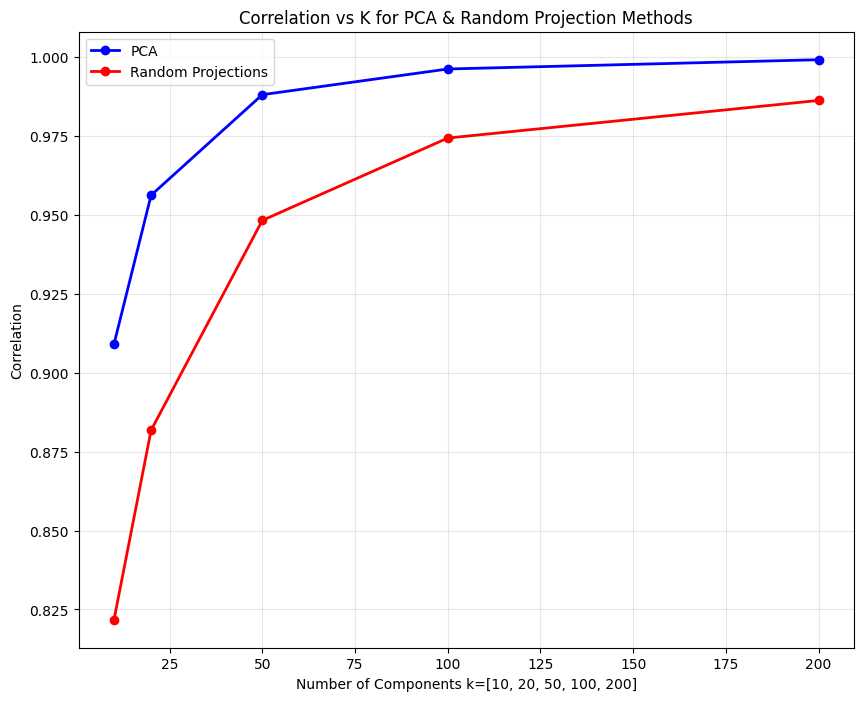

In [ ]:
# Graph Correlation vs K for PCA and Random Projections
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(target_dims, pca_correlations, 'b-o', label='PCA', linewidth=2)
plt.plot(target_dims, random_projection_correlations, 'r-o', label='Random Projections', linewidth=2)
plt.xlabel('Number of Components k=[10, 20, 50, 100, 200]')
plt.ylabel('Correlation')
plt.title('Correlation vs K for PCA & Random Projection Methods')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 4. Clustering Fashion-MNIST using spectral clustering

In [7]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


In [9]:
# Sample
import random

np.random.seed(1)
random.seed(1)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Class counts:")
for i in range(len(classes)):
  print(f"{classes[i]}: {np.sum(y == i)}")

X_sample = []
y_sample = []

for i in range(len(classes)):
    class_mask = y == i
    class_indices = np.where(class_mask)[0]
    random_sample = np.random.choice(class_indices, 2000, replace=False)

    X_sample.extend(X[random_sample])
    y_sample.extend(y[random_sample])

X_sample = np.array(X_sample)
y_sample = np.array(y_sample)

print()
print("Sample class counts:")
for i in range(len(classes)):
  print(f"{classes[i]}: {np.sum(y_sample == i)}")

print()
print("Sampled data shape:", X_sample.shape)
print("Sampled labels shape:", y_sample.shape)

Class counts:
T-shirt/top: 7000
Trouser: 7000
Pullover: 7000
Dress: 7000
Coat: 7000
Sandal: 7000
Shirt: 7000
Sneaker: 7000
Bag: 7000
Ankle boot: 7000

Sample class counts:
T-shirt/top: 2000
Trouser: 2000
Pullover: 2000
Dress: 2000
Coat: 2000
Sandal: 2000
Shirt: 2000
Sneaker: 2000
Bag: 2000
Ankle boot: 2000

Sampled data shape: (20000, 784)
Sampled labels shape: (20000,)


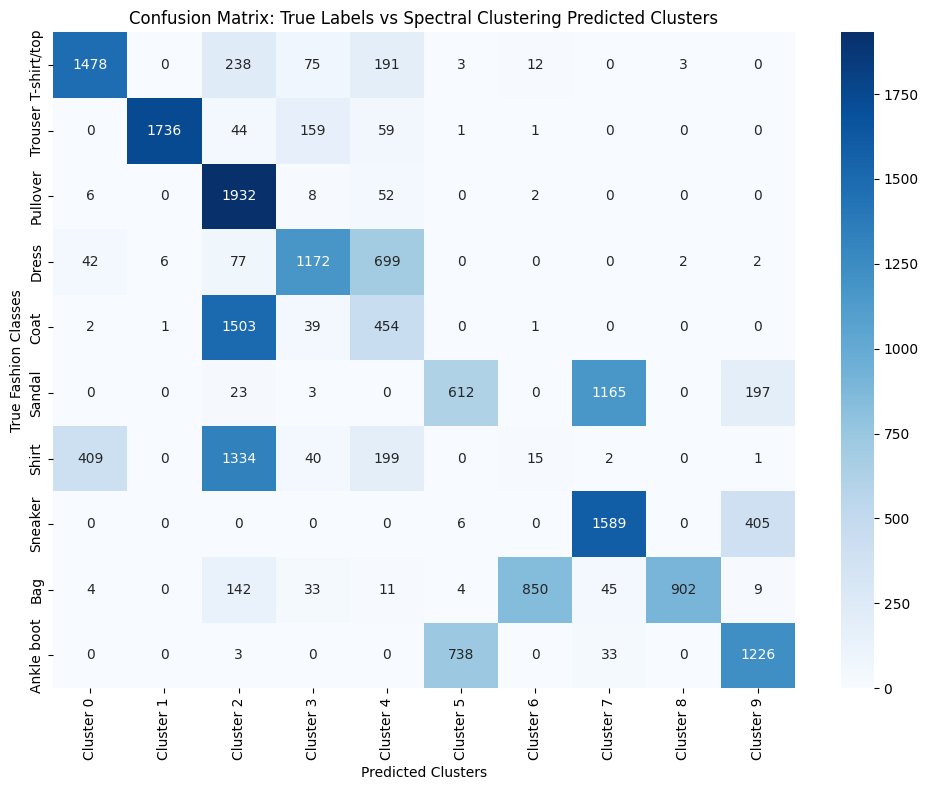

In [10]:
# Spectral Clustering Analysis
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import SpectralClustering
import seaborn as sns
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

# spectral_clustering_model = SpectralClustering(n_clusters=10, random_state=1) # affinity='rbf'
spectral_clustering_model = SpectralClustering(n_clusters=10, random_state=1, affinity='nearest_neighbors', n_neighbors=10)
y_pred = spectral_clustering_model.fit_predict(X_sample_scaled)

cm = confusion_matrix(y_sample, y_pred)

# Find the best label mapping
row_ind, col_ind = linear_sum_assignment(-cm)

# Create a mapping dictionary
label_mapping = {}
for i in range(len(row_ind)):
    label_mapping[col_ind[i]] = row_ind[i]

# Apply the mapping
y_pred_mapped = np.array([label_mapping[label] for label in y_pred])

cm_mapped = confusion_matrix(y_sample, y_pred_mapped)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_mapped, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in range(10)],
            yticklabels=classes)
plt.title('Confusion Matrix: True Labels vs Spectral Clustering Predicted Clusters')
plt.ylabel('True Fashion Classes')
plt.xlabel('Predicted Clusters')
plt.tight_layout()
plt.show()

In [11]:
def cluster_purity(y_true, y_pred):
    return {cluster: (np.bincount(y_true[y_pred == cluster]).max() /
                     np.sum(y_pred == cluster)) * 100
            for cluster in np.unique(y_pred)}

purities = cluster_purity(y_sample, y_pred)

purities_by_class = {}
# same cluster mapping as the correlation matrix
for cluster, purity in purities.items():
    mapped_class = label_mapping[cluster]
    purities_by_class[mapped_class] = purity

for mapped_class in sorted(purities_by_class.keys()):
    purity = purities_by_class[mapped_class]
    print(f"Cluster: {mapped_class} | Purity: {purity:.1f}%")

print()
print(f"Mean: {np.mean(list(purities_by_class.values())):.1f}%")

Cluster: 0 | Purity: 76.1%
Cluster: 1 | Purity: 99.6%
Cluster: 2 | Purity: 36.5%
Cluster: 3 | Purity: 76.7%
Cluster: 4 | Purity: 42.0%
Cluster: 5 | Purity: 54.1%
Cluster: 6 | Purity: 96.5%
Cluster: 7 | Purity: 56.1%
Cluster: 8 | Purity: 99.4%
Cluster: 9 | Purity: 66.6%

Mean: 70.4%


[np.float64(0.16835037247544124), np.float64(0.06413667152640837), np.float64(0.0628750430618246), np.float64(0.07980769823974128), np.float64(0.09559514144679232), np.float64(0.09464506045543024), np.float64(0.10058924149817647), np.float64(0.0899659405541044), np.float64(0.07516292953088785), np.float64(0.10722796657633411), np.float64(0.0952302847074394), np.float64(0.06609140637670614), np.float64(0.05635838967881533), np.float64(0.06548959436520806)]


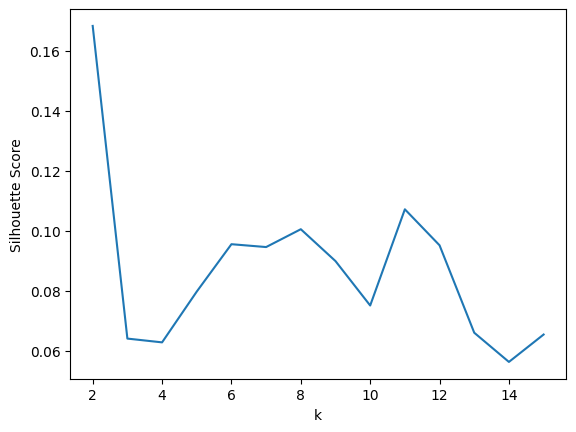

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
silhouette_avg = []

for k in range_n_clusters:
    spectral_clustering_model = SpectralClustering(n_clusters=k, random_state=1, affinity='nearest_neighbors', n_neighbors=10)
    cluster_labels = spectral_clustering_model.fit_predict(X_sample_scaled)
    silhouette_avg.append(silhouette_score(X_sample_scaled, cluster_labels))

print(silhouette_avg)
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()